***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
df = pd.read_csv("dados.csv")

### Visualize o conteúdo do DataFrame

In [3]:
print(df.head())
df.shape

   UF  Sexo  Idade  Cor  Anos de Estudo  Renda    Altura
0  11     0     23    8              12    800  1.603808
1  11     1     23    2              12   1150  1.739790
2  11     1     35    8              15    880  1.760444
3  11     0     46    2               6   3500  1.783158
4  11     1     47    8               9    150  1.690631


(76840, 7)

### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)
### 2º Definir os labels das classes
### 3º Construir a coluna de frequências

In [4]:
# Definindo o valor do salário mínimo como base para determinar as classes de renda
salario_minimo = 788.00

# Definindo os intervalos que delimitam as classes sociais com base no salário mínimo
# Cada intervalo representa uma faixa de renda, onde o primeiro intervalo vai de menos infinito até 1x o salário mínimo,
# o segundo intervalo vai de 1x até 2x o salário mínimo, e assim por diante.
intervalos = [
    -float("inf"),
    salario_minimo,
    2 * salario_minimo,
    5 * salario_minimo,
    10 * salario_minimo,
    15 * salario_minimo,
    25 * salario_minimo,
    float("inf"),
]
rotulos = ["G", "F", "E", "D", "C", "B", "A"]

# Adicionando uma nova coluna chamada 'Classe' no DataFrame para representar as classes de renda
# Utilizando a função pd.cut() para categorizar os valores da coluna "Renda" nos intervalos definidos, 
# atribuindo os rótulos correspondentes a cada intervalo
df["Classe"] = pd.cut(df["Renda"], bins=intervalos, labels=rotulos, right=False)

# Contagem do número de indivíduos em cada classe de renda
# Utilizando o método value_counts() para contar a frequência de cada classe de renda no DataFrame
frequencia_renda = df["Classe"].value_counts()

# Ordenando as classes de renda em ordem decrescente (de A a G)
# Utilizando o método sort_index() para ordenar as classes de renda em ordem alfabética decrescente
frequencia_renda = frequencia_renda.sort_index(ascending=False)

# Calculando a porcentagem de indivíduos em cada classe de renda
# Dividindo a frequência de cada classe pelo número total de linhas do DataFrame e multiplicando por 100
total_linhas = df.shape[0]
percentual = (frequencia_renda / total_linhas) * 100

# Criando um DataFrame para armazenar a frequência e a porcentagem de cada classe de renda
# Utilizando a função pd.DataFrame() para criar um novo DataFrame com as frequências e porcentagens calculadas
distribuicao_de_frequencia_renda = pd.DataFrame({"Frequencia": frequencia_renda, "Porcentagem (%)": percentual})

# Exibindo a distribuição de frequência das classes de renda
print("Frequência e Porcentagem (%) de cada classe de renda:")
print(distribuicao_de_frequencia_renda)

# Calculando a soma total das frequências das classes de renda
# Utilizando o método sum() para somar todas as frequências das classes de renda
soma_total_classes = frequencia_renda.sum()
print("\nSoma de todas as classes:", soma_total_classes)

# Verificando se a soma total das frequências coincide com o número total de linhas no DataFrame
# Comparando a soma total das frequências com o número total de linhas do DataFrame e exibindo uma mensagem correspondente
if soma_total_classes == total_linhas:
    print("A soma de todas as classes coincide com o número de linhas do DataFrame.")
else:
    print("A soma de todas as classes não coincide com o número de linhas do DataFrame. Verifique os dados ou o código.")


Frequência e Porcentagem (%) de cada classe de renda:
        Frequencia  Porcentagem (%)
Classe                             
A              420         0.546590
B              823         1.071057
C             1568         2.040604
D             5700         7.418011
E            18972        24.690265
F            34056        44.320666
G            15301        19.912806

Soma de todas as classes: 76840
A soma de todas as classes coincide com o número de linhas do DataFrame.


In [5]:
df.shape

(76840, 8)

In [6]:
distribuicao_de_frequencia_renda.shape

(7, 2)

### 4º Construir a coluna de percentuais
### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes
### 6º Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

/home/clara/.local/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


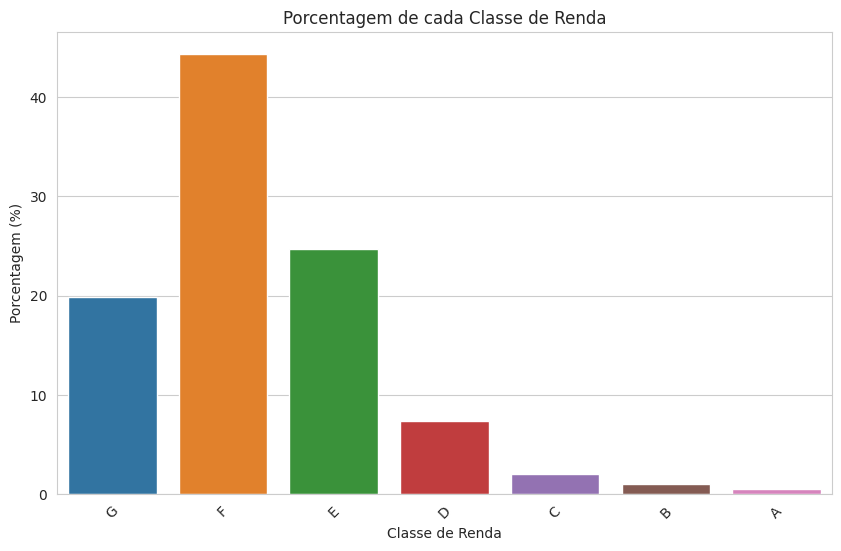

In [7]:
# Definindo o estilo do gráfico
# Utilizando a função sns.set_style() para definir o estilo do gráfico como "whitegrid", que adiciona grades de fundo brancas ao gráfico
sns.set_style("whitegrid")

# Criando o gráfico de barras
# Utilizando a função plt.figure() para criar uma figura com o tamanho especificado (10 polegadas de largura por 6 polegadas de altura)
# Utilizando a função sns.barplot() para criar o gráfico de barras com base nos dados do DataFrame distribuicao_de_frequencia_renda
# O eixo x é definido como os índices do DataFrame (as classes de renda) e o eixo y como a coluna "Porcentagem (%)"
plt.figure(figsize=(10, 6))
sns.barplot(data=distribuicao_de_frequencia_renda, x=distribuicao_de_frequencia_renda.index, y="Porcentagem (%)")

# Adicionando rótulos e título
# Utilizando as funções plt.xlabel(), plt.ylabel() e plt.title() para adicionar rótulos aos eixos x e y, e um título ao gráfico, respectivamente
plt.xlabel('Classe de Renda')
plt.ylabel('Porcentagem (%)')
plt.title('Porcentagem de cada Classe de Renda')

# Rotacionando os rótulos do eixo x para melhor visualização
# Utilizando a função plt.xticks() para rotacionar os rótulos do eixo x em 45 graus para melhor legibilidade
plt.xticks(rotation=45)

# Exibindo o gráfico
# Utilizando a função plt.show() para exibir o gráfico criado
plt.show()


        "Decidi adicionar mais classes de renda devido à grande disparidade nos intervalos originais, buscando uma análise mais refinada. Além disso, implementei verificações adicionais e defini uma variável que pode ser ajustada conforme o salário mínimo do ano em estudo."

Com base nos dados fornecidos da Pesquisa Nacional por Amostra de Domicílios - 2015, sobre a distribuição de renda das famílias brasileiras, podemos destacar alguns insights:

1. Desigualdade de renda: A distribuição da renda é bastante desigual, com uma grande concentração de famílias nas classes de menor renda (classes F e G), representando mais de 60% da amostra total.

2. Classe de renda predominante: A classe F, que representa famílias com renda entre 1 e 2 salários mínimos, é a mais frequente, com mais de 44% da amostra total.

3. Baixa representatividade das classes de renda mais alta: As classes A, B e C, que representam famílias com renda superior a 10 salários mínimos, juntas, representam menos de 5% da amostra total, evidenciando uma baixa representatividade de famílias com maior poder aquisitivo na pesquisa.

4. Grande número de famílias com baixa renda: As classes E, F e G, que representam famílias com renda de até 5 salários mínimos, correspondem a mais de 88% da amostra total, indicando que a maioria das famílias pesquisadas possui uma renda considerada baixa.

Esses insights sugerem a necessidade de políticas públicas voltadas para a redução da desigualdade de renda e para o aumento do acesso da população a oportunidades de melhoria socioeconômica, como educação, emprego e saúde.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

In [8]:
pessoas_renda_menor_20000 = df[df['Renda'] < 20000].shape[0]

print("Número de pessoas com renda menor que 20000:", pessoas_renda_menor_20000)

Número de pessoas com renda menor que 20000: 76420


### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [9]:
# Dicionário de mapeamento para os valores de sexo, onde 0 representa "Masculino" e 1 representa "Feminino"
Sexo = {0: "Masculino", 1: "Feminino"}

# Dicionário de mapeamento para os valores de cor, onde os números representam diferentes categorias de cor
Cor = {
    0: "Indígena",
    2: "Branca",
    4: "Preta",
    6: "Amarela",
    8: "Parda",
    9: "Sem declaração",
}

# Dicionário de mapeamento para os anos de estudo, onde cada número representa uma categoria de anos de estudo
Anos_de_Estudo = {
    1: "Sem instrução e menos de 1 ano",
    2: "1 ano",
    3: "2 anos",
    4: "3 anos",
    5: "4 anos",
    6: "5 anos",
    7: "6 anos",
    8: "7 anos",
    9: "8 anos",
    10: "9 anos",
    11: "10 anos",
    12: "11 anos",
    13: "12 anos",
    14: "13 anos",
    15: "14 anos",
    16: "15 anos ou mais",
    17: "Não determinados",
}

# Dicionário de mapeamento para os valores de UF (Unidades Federativas), onde os números representam os códigos de cada estado
UF = {
    11: "Rondônia",
    12: "Acre",
    13: "Amazonas",
    14: "Roraima",
    15: "Pará",
    16: "Amapá",
    17: "Tocantins",
    21: "Maranhão",
    22: "Piauí",
    23: "Ceará",
    24: "Rio Grande do Norte",
    25: "Paraíba",
    26: "Pernambuco",
    27: "Alagoas",
    28: "Sergipe",
    29: "Bahia",
    31: "Minas Gerais",
    32: "Espírito Santo",
    33: "Rio de Janeiro",
    35: "São Paulo",
    41: "Paraná",
    42: "Santa Catarina",
    43: "Rio Grande do Sul",
    50: "Mato Grosso do Sul",
    51: "Mato Grosso",
    52: "Goiás",
    53: "Distrito Federal",
}

# Edição do DataFrame original para criar um novo DataFrame modificado
df_modificado = df.copy()

# Mapeamento das colunas Sexo, Cor, Anos de Estudo e UF com base nos dicionários de mapeamento definidos acima
df_modificado["Sexo"] = df_modificado["Sexo"].map(Sexo)
df_modificado["Cor"] = df_modificado["Cor"].map(Cor)
df_modificado["Anos de Estudo"] = df_modificado["Anos de Estudo"].map(Anos_de_Estudo)
df_modificado["UF"] = df_modificado["UF"].map(UF)

# Exibição do DataFrame modificado com as colunas de Sexo e UF mapeadas
df_modificado

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,Rondônia,Masculino,23,Parda,11 anos,800,1.603808,F
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.739790,F
2,Rondônia,Feminino,35,Parda,14 anos,880,1.760444,F
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.783158,E
4,Rondônia,Feminino,47,Parda,8 anos,150,1.690631,G
...,...,...,...,...,...,...,...,...
76835,Distrito Federal,Feminino,46,Branca,10 anos,812,1.687030,F
76836,Distrito Federal,Masculino,30,Preta,6 anos,1500,1.792934,F
76837,Distrito Federal,Masculino,32,Parda,11 anos,1300,1.830587,F
76838,Distrito Federal,Masculino,57,Parda,3 anos,1500,1.726344,F


In [10]:
# Lista dos estados brasileiros contendo os nomes de cada estado
estados_brasileiros = [
    "Rondônia", "Acre", "Amazonas", "Roraima", "Pará", "Amapá", "Tocantins",
    "Maranhão", "Piauí", "Ceará", "Rio Grande do Norte", "Paraíba", "Pernambuco",
    "Alagoas", "Sergipe", "Bahia", "Minas Gerais", "Espírito Santo", "Rio de Janeiro",
    "São Paulo", "Paraná", "Santa Catarina", "Rio Grande do Sul", "Mato Grosso do Sul",
    "Mato Grosso", "Goiás", "Distrito Federal"
]

# Filtragem do DataFrame modificado para incluir apenas os estados brasileiros presentes na lista estados_brasileiros
filtro_estados_brasileiros = df_modificado[df_modificado['UF'].isin(estados_brasileiros)]

# Contagem do número de indivíduos em cada estado brasileiro
contagem_por_estado = filtro_estados_brasileiros['UF'].value_counts()

# Exibição do resultado da contagem de indivíduos em cada estado brasileiro
print(contagem_por_estado)

UF
São Paulo              8544
Minas Gerais           7686
Rio Grande do Sul      6322
Bahia                  5717
Rio de Janeiro         5556
Pará                   4449
Paraná                 4356
Pernambuco             3820
Goiás                  3478
Ceará                  3359
Santa Catarina         2275
Amazonas               2206
Distrito Federal       2054
Mato Grosso            1800
Maranhão               1787
Rondônia               1537
Espírito Santo         1511
Mato Grosso do Sul     1440
Tocantins              1306
Sergipe                1287
Paraíba                1274
Piauí                  1211
Rio Grande do Norte     973
Acre                    937
Alagoas                 903
Roraima                 540
Amapá                   512
Name: count, dtype: int64


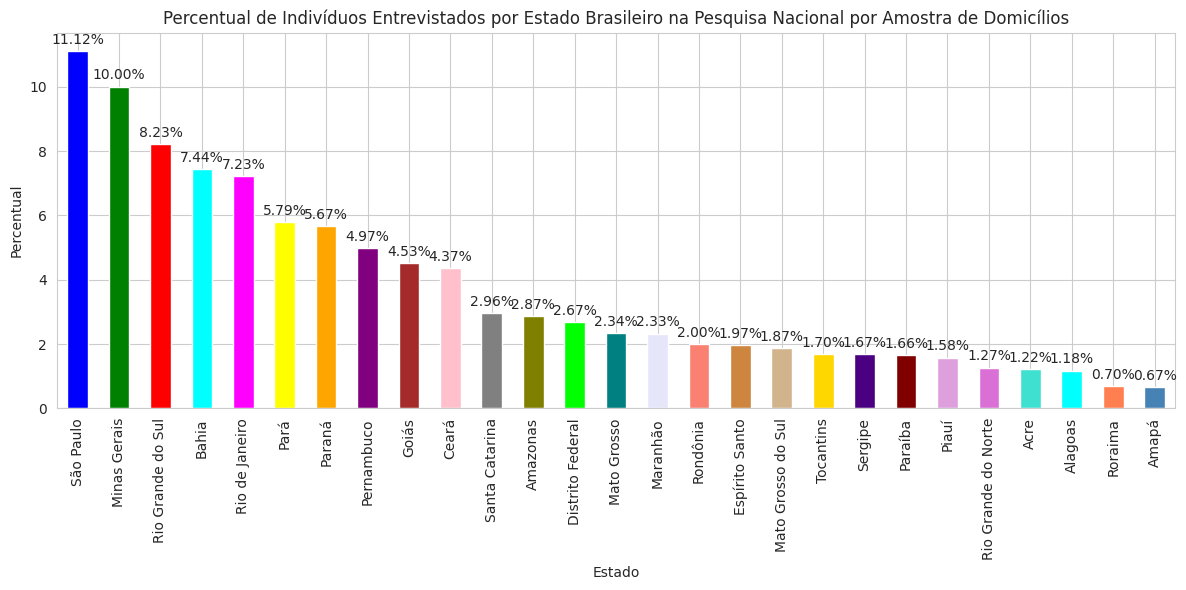

In [11]:
# Definição das cores a serem utilizadas para representar cada estado no gráfico
cores = [
    "blue",
    "green",
    "red",
    "cyan",
    "magenta",
    "yellow",
    "orange",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "lime",
    "teal",
    "lavender",
    "salmon",
    "peru",
    "tan",
    "gold",
    "indigo",
    "maroon",
    "plum",
    "orchid",
    "turquoise",
    "aqua",
    "coral",
    "steelblue",
]

# Cálculo dos valores percentuais de participação de cada estado em relação ao total
total = contagem_por_estado.sum()
percentuais = (contagem_por_estado / total) * 100

# Criação da figura e dos eixos do gráfico, com tamanho ajustável
fig, ax = plt.subplots(figsize=(12, 6))

# Plotagem do histograma, utilizando cores diferentes para cada barra e exibindo os valores percentuais
bars = percentuais.plot(kind="bar", ax=ax, color=cores)

# Adição dos valores percentuais acima de cada barra do gráfico
for bar in bars.patches:
    ax.annotate(
        "{:.2f}%".format(bar.get_height()),
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

# Definição do título e dos rótulos dos eixos do gráfico
ax.set_title(
    "Percentual de Indivíduos Entrevistados por Estado Brasileiro na Pesquisa Nacional por Amostra de Domicílios"
)
ax.set_xlabel("Estado")
ax.set_ylabel("Percentual")

# Rotação dos rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

# Exibição do gráfico
plt.tight_layout()
plt.show()

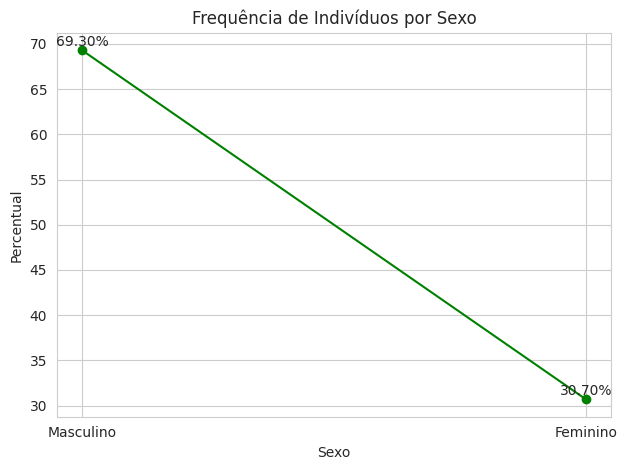

In [12]:
# Cálculo da frequência de cada sexo presente no DataFrame modificado
frequencia_por_sexo = df_modificado['Sexo'].value_counts()

# Cálculo do total de indivíduos no DataFrame
total_individuos = df_modificado.shape[0]

# Cálculo da frequência em percentual de cada sexo
percentual_por_sexo = (frequencia_por_sexo / total_individuos) * 100

# Criação da figura e dos eixos do gráfico
fig, ax = plt.subplots()

# Plotagem do gráfico de linha, representando os valores percentuais de cada sexo
percentual_por_sexo.plot(kind='line', ax=ax, marker='o', color='green')

# Definição do título e dos rótulos dos eixos do gráfico
ax.set_title('Frequência de Indivíduos por Sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Percentual')

# Definição dos rótulos do eixo x para melhor representação ("Masculino" e "Feminino")
plt.xticks([0, 1], ['Masculino', 'Feminino'])

# Exibição dos valores em cada ponto da linha do gráfico
for i, v in enumerate(percentual_por_sexo):
    ax.text(i, v + 0.5, f"{v:.2f}%", ha='center')

# Exibição do gráfico com layout ajustado e grade habilitada
plt.tight_layout()
plt.grid(True)
plt.show()


In [13]:
def atribuir_classe_faixa_etaria(idade):
    if idade < 18:
        return 'Menores de Idade'
    elif idade < 25:
        return 'Jovens'
    elif idade < 45:
        return 'Jovens Adultos'
    elif idade < 65:
        return 'Meia Idade'
    else:
        return 'Idosos'

def criar_coluna_faixa_etaria(df):
    df['Faixa Etária'] = df['Idade'].apply(atribuir_classe_faixa_etaria)
    return df

# Exemplo de uso:
# Supondo que df_modificado é o seu DataFrame com a coluna 'Idade'
# Substitua df_modificado pelo nome correto do seu DataFrame
df_modificado = criar_coluna_faixa_etaria(df_modificado)
df_modificado


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe,Faixa Etária
0,Rondônia,Masculino,23,Parda,11 anos,800,1.603808,F,Jovens
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.739790,F,Jovens
2,Rondônia,Feminino,35,Parda,14 anos,880,1.760444,F,Jovens Adultos
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.783158,E,Meia Idade
4,Rondônia,Feminino,47,Parda,8 anos,150,1.690631,G,Meia Idade
...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,Feminino,46,Branca,10 anos,812,1.687030,F,Meia Idade
76836,Distrito Federal,Masculino,30,Preta,6 anos,1500,1.792934,F,Jovens Adultos
76837,Distrito Federal,Masculino,32,Parda,11 anos,1300,1.830587,F,Jovens Adultos
76838,Distrito Federal,Masculino,57,Parda,3 anos,1500,1.726344,F,Meia Idade


In [14]:
def calcular_percentual_faixa_etaria(df_modificado):
    total_entrevistados = len(df_modificado)  # Corrigido para calcular o total de entrevistados com base no comprimento do DataFrame
    frequencia_faixa_etaria = df_modificado['Faixa Etária'].value_counts().reset_index()
    frequencia_faixa_etaria.columns = ['Faixa Etária', 'Frequência']
    frequencia_faixa_etaria['Percentual'] = (frequencia_faixa_etaria['Frequência'] / total_entrevistados) * 100
    return frequencia_faixa_etaria
# Substitua df_modificado pelo nome correto do seu DataFrame
frequencia_faixa_etaria = calcular_percentual_faixa_etaria(df_modificado)

In [15]:
def print_frequencia_faixa_etaria(frequencia_faixa_etaria):
    print("Frequência de Faixas Etárias:")
    print("-----------------------------")
    for index, row in frequencia_faixa_etaria.iterrows():
        faixa_etaria = row['Faixa Etária']
        frequencia = row['Frequência']
        if faixa_etaria == 'Menores de Idade':
            print(f"A faixa etária de {faixa_etaria} é de 0 a 18 anos, nessa pesquisa foram entrevistados \033[1m{frequencia}\033[0m indivíduos.")
        elif faixa_etaria == 'Jovens':
            print(f"A faixa etária de {faixa_etaria} é de 18 a 25 anos, nessa pesquisa foram entrevistados \033[1m{frequencia}\033[0m indivíduos.")
        elif faixa_etaria == 'Jovens Adultos':
            print(f"A faixa etária de {faixa_etaria} é de 25 a 45 anos, nessa pesquisa foram entrevistados \033[1m{frequencia}\033[0m indivíduos.")
        elif faixa_etaria == 'Meia Idade':
            print(f"A faixa etária de {faixa_etaria} é de 45 a 65 anos, nessa pesquisa foram entrevistados \033[1m{frequencia}\033[0m indivíduos.")
        else:
            print(f"A faixa etária de {faixa_etaria} é acima de 65 anos, nessa pesquisa foram entrevistados \033[1m{frequencia}\033[0m indivíduos.")
    print("-----------------------------")

# Exemplo de uso:
# Supondo que frequencia_faixa_etaria é o DataFrame retornado pela função contar_frequencia_faixa_etaria
print_frequencia_faixa_etaria(frequencia_faixa_etaria)


Frequência de Faixas Etárias:
-----------------------------
A faixa etária de Jovens Adultos é de 25 a 45 anos, nessa pesquisa foram entrevistados 37375 indivíduos.
A faixa etária de Meia Idade é de 45 a 65 anos, nessa pesquisa foram entrevistados 31801 indivíduos.
A faixa etária de Idosos é acima de 65 anos, nessa pesquisa foram entrevistados 4322 indivíduos.
A faixa etária de Jovens é de 18 a 25 anos, nessa pesquisa foram entrevistados 3275 indivíduos.
A faixa etária de Menores de Idade é de 0 a 18 anos, nessa pesquisa foram entrevistados 67 indivíduos.
-----------------------------


<Figure size 1200x800 with 0 Axes>

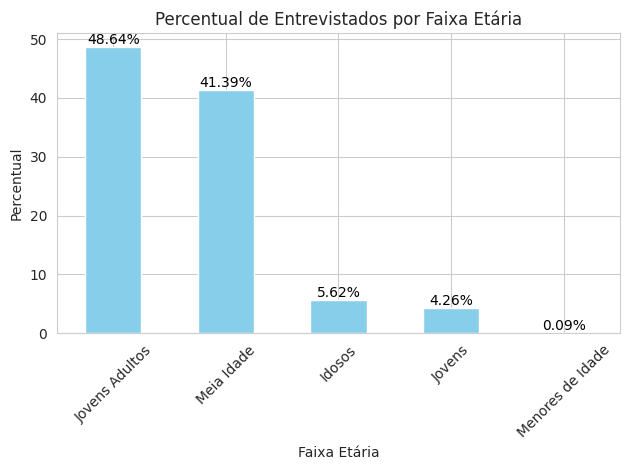

In [16]:
def plotar_grafico_barras(frequencia_faixa_etaria):
    plt.figure(figsize=(12, 8))
    ax = frequencia_faixa_etaria.plot(kind='bar', x='Faixa Etária', y='Percentual', legend=None, color='skyblue')
    ax.set_ylabel('Percentual')
    ax.set_xlabel('Faixa Etária')
    ax.set_title('Percentual de Entrevistados por Faixa Etária')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plotar_grafico_barras(frequencia_faixa_etaria)


In [17]:
def classificacao_de_escolaridade(anos):
    if anos < 9:
        return "Ensino fundamental incompleto"
    elif anos == 9:
        return "Ensino fundamental completo"
    elif anos >= 10 and anos <= 11:
        return "Ensino médio incompleto"
    elif anos == 12:
        return "Ensino médio completo"
    elif anos >= 13 and anos <= 15:
        return "Ensino superior incompleto"
    elif anos == 16:
        return "Ensino superior completo"
    else:
        return "Especializações"

# Aplicando a função ao dataframe df
df['Escolaridade'] = df['Anos de Estudo'].apply(classificacao_de_escolaridade)

# Exibindo o dataframe com a nova coluna
df


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe,Escolaridade
0,11,0,23,8,12,800,1.603808,F,Ensino médio completo
1,11,1,23,2,12,1150,1.739790,F,Ensino médio completo
2,11,1,35,8,15,880,1.760444,F,Ensino superior incompleto
3,11,0,46,2,6,3500,1.783158,E,Ensino fundamental incompleto
4,11,1,47,8,9,150,1.690631,G,Ensino fundamental completo
...,...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030,F,Ensino médio incompleto
76836,53,0,30,4,7,1500,1.792934,F,Ensino fundamental incompleto
76837,53,0,32,8,12,1300,1.830587,F,Ensino médio completo
76838,53,0,57,8,4,1500,1.726344,F,Ensino fundamental incompleto


In [18]:
# Calculando a frequência de cada classe de estudo
frequencia = df['Escolaridade'].value_counts()

# Calculando o percentual para cada classe de estudo
percentual = (frequencia / len(df)) * 100
percentual = percentual.round(2)  # Arredondando para 2 casas decimais

# Criando um novo dataframe para armazenar as frequências e percentuais
df_freq_percent = pd.DataFrame({'Frequência': frequencia, 'Percentual': percentual})

# Exibindo o dataframe com as frequências e percentuais
print(df_freq_percent)


                               Frequência  Percentual
Escolaridade                                         
Ensino fundamental incompleto       28591       37.21
Ensino médio completo               20848       27.13
Ensino superior completo            10795       14.05
Ensino fundamental completo          7980       10.39
Ensino superior incompleto           4477        5.83
Ensino médio incompleto              3958        5.15
Especializações                       191        0.25


/tmp/ipykernel_29734/7097824.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(bar.get_x() + bar.get_width()/2, yval, f'{df_freq_percent_sorted["Percentual"][i]:.2f}%', ha='center', va='bottom')


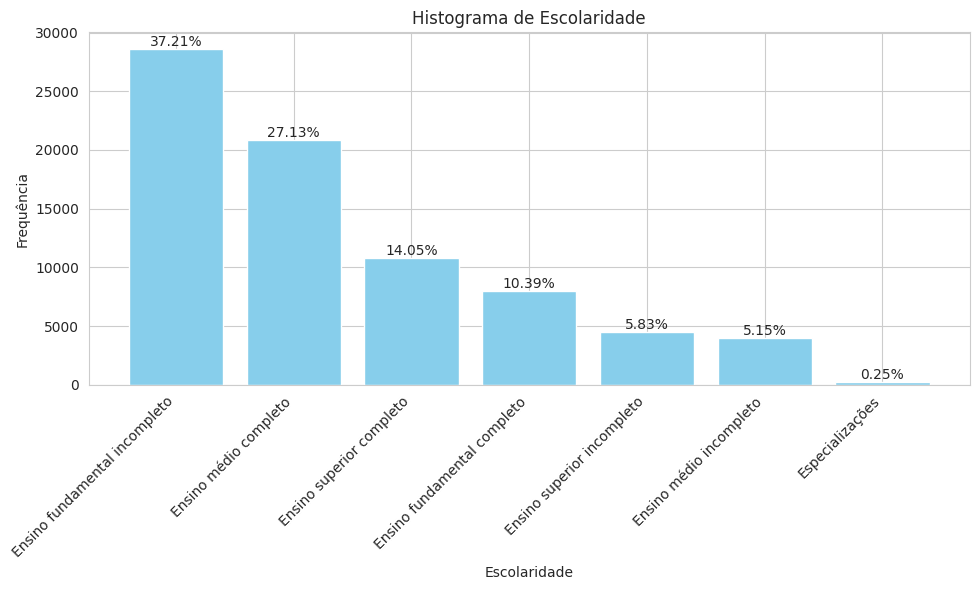

In [19]:
# Ordenando as classes de escolaridade pelo percentual em ordem decrescente
df_freq_percent_sorted = df_freq_percent.sort_values(by='Percentual', ascending=False)

# Plotando o histograma
plt.figure(figsize=(10, 6))
bars = plt.bar(df_freq_percent_sorted.index, df_freq_percent_sorted['Frequência'], color='skyblue')

# Adicionando o percentual em cima de cada barra
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{df_freq_percent_sorted["Percentual"][i]:.2f}%', ha='center', va='bottom')

plt.xlabel('Escolaridade')
plt.ylabel('Frequência')
plt.title('Histograma de Escolaridade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [20]:
# Calcular a frequência das raças na coluna "Cor"
frequencia_racas = df_modificado['Cor'].value_counts()

# Exibir o resultado
print(frequencia_racas)


Cor
Parda       35925
Branca      31815
Preta        8391
Indígena      357
Amarela       352
Name: count, dtype: int64


In [21]:
# Calcular o número total de registros
total_registros = len(df_modificado)
percentual_racas = round((frequencia_racas / total_registros) * 100, 2)
# Exibir o resultado
print(percentual_racas)


Cor
Parda       46.75
Branca      41.40
Preta       10.92
Indígena     0.46
Amarela      0.46
Name: count, dtype: float64


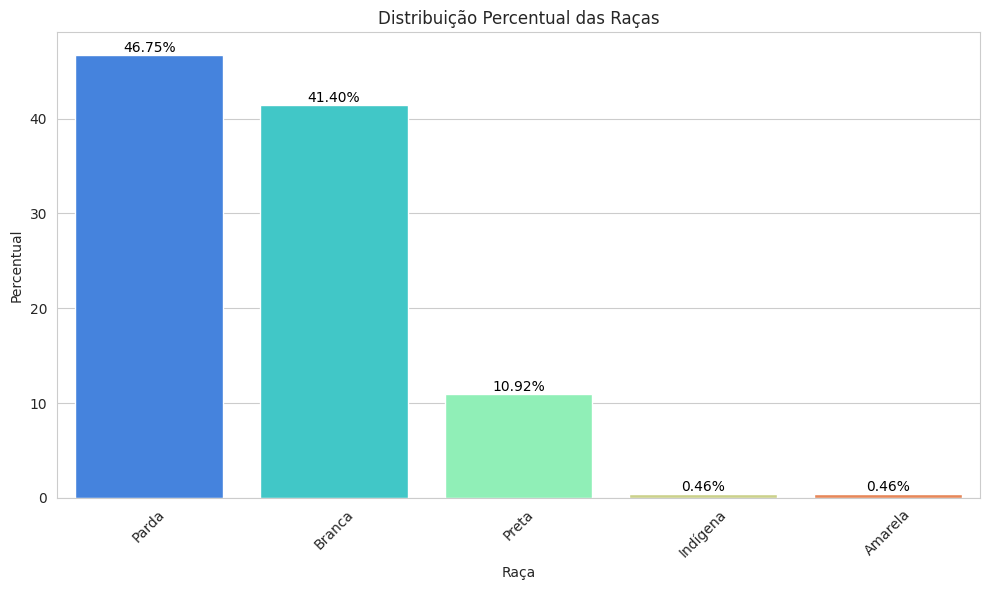

In [22]:
# Definir o estilo do gráfico
sns.set_style("whitegrid")

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))  # Definir o tamanho da figura

# Plotar as barras
grafico = sns.barplot(x=percentual_racas.index, y=percentual_racas.values, palette="rainbow")

# Adicionar os valores percentuais em cima de cada barra
for p in grafico.patches:
    grafico.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Definir o título e os rótulos dos eixos
plt.title('Distribuição Percentual das Raças')
plt.xlabel('Raça')
plt.ylabel('Percentual')

# Exibir o gráfico
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajustar o layout para evitar cortes
plt.show()


## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

In [23]:
df_modificado


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe,Faixa Etária
0,Rondônia,Masculino,23,Parda,11 anos,800,1.603808,F,Jovens
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.739790,F,Jovens
2,Rondônia,Feminino,35,Parda,14 anos,880,1.760444,F,Jovens Adultos
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.783158,E,Meia Idade
4,Rondônia,Feminino,47,Parda,8 anos,150,1.690631,G,Meia Idade
...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,Feminino,46,Branca,10 anos,812,1.687030,F,Meia Idade
76836,Distrito Federal,Masculino,30,Preta,6 anos,1500,1.792934,F,Jovens Adultos
76837,Distrito Federal,Masculino,32,Parda,11 anos,1300,1.830587,F,Jovens Adultos
76838,Distrito Federal,Masculino,57,Parda,3 anos,1500,1.726344,F,Meia Idade


In [24]:
# Calculando a média aritmética
media_aritmetica = df_modificado['Renda'].mean()
print("Média aritmética da renda:", round(media_aritmetica, 3))

# Calculando a mediana
mediana = df_modificado['Renda'].median()
print("Mediana da renda:", round(mediana, 3))

# Calculando a moda
moda = df_modificado['Renda'].mode()
print("Moda da renda:", moda)

# Calculando o desvio médio absoluto sem usar a função mad
desvio_medio_absoluto = df_modificado['Renda'].apply(lambda x: abs(x - df_modificado['Renda'].median())).mean()
print("Desvio médio absoluto da renda:", round(desvio_medio_absoluto, 3))


# Calculando a variância
variancia = df_modificado['Renda'].var()
print("Variância da renda:", round(variancia, 3))

# Calculando o desvio padrão
desvio_padrao = df_modificado['Renda'].std()
print("Desvio padrão da renda:", round(desvio_padrao, 3))

# Calculando a média, mediana e valor máximo da variável Renda segundo Sexo e Cor
estatisticas_por_grupo = df_modificado.groupby(['Sexo', 'Cor'])['Renda'].agg(['mean', 'median', 'max'])
print("\nMédia, mediana e valor máximo da renda por Sexo e Cor:")
print(estatisticas_por_grupo)


Média aritmética da renda: 2000.383
Mediana da renda: 1200.0
Moda da renda: 0    788
Name: Renda, dtype: int64
Desvio médio absoluto da renda: 1313.289
Variância da renda: 11044906.006
Desvio padrão da renda: 3323.388

Média, mediana e valor máximo da renda por Sexo e Cor:
                           mean  median     max
Sexo      Cor                                  
Feminino  Amarela   3027.341880  1500.0   20000
          Branca    2109.866750  1200.0  100000
          Indígena  2464.386139   788.0  120000
          Parda     1176.758516   800.0   30000
          Preta     1134.596400   800.0   23000
Masculino Amarela   4758.251064  2800.0   50000
          Branca    2925.744435  1700.0  200000
          Indígena  1081.710938   797.5   10000
          Parda     1659.577425  1200.0  100000
          Preta     1603.861687  1200.0   50000


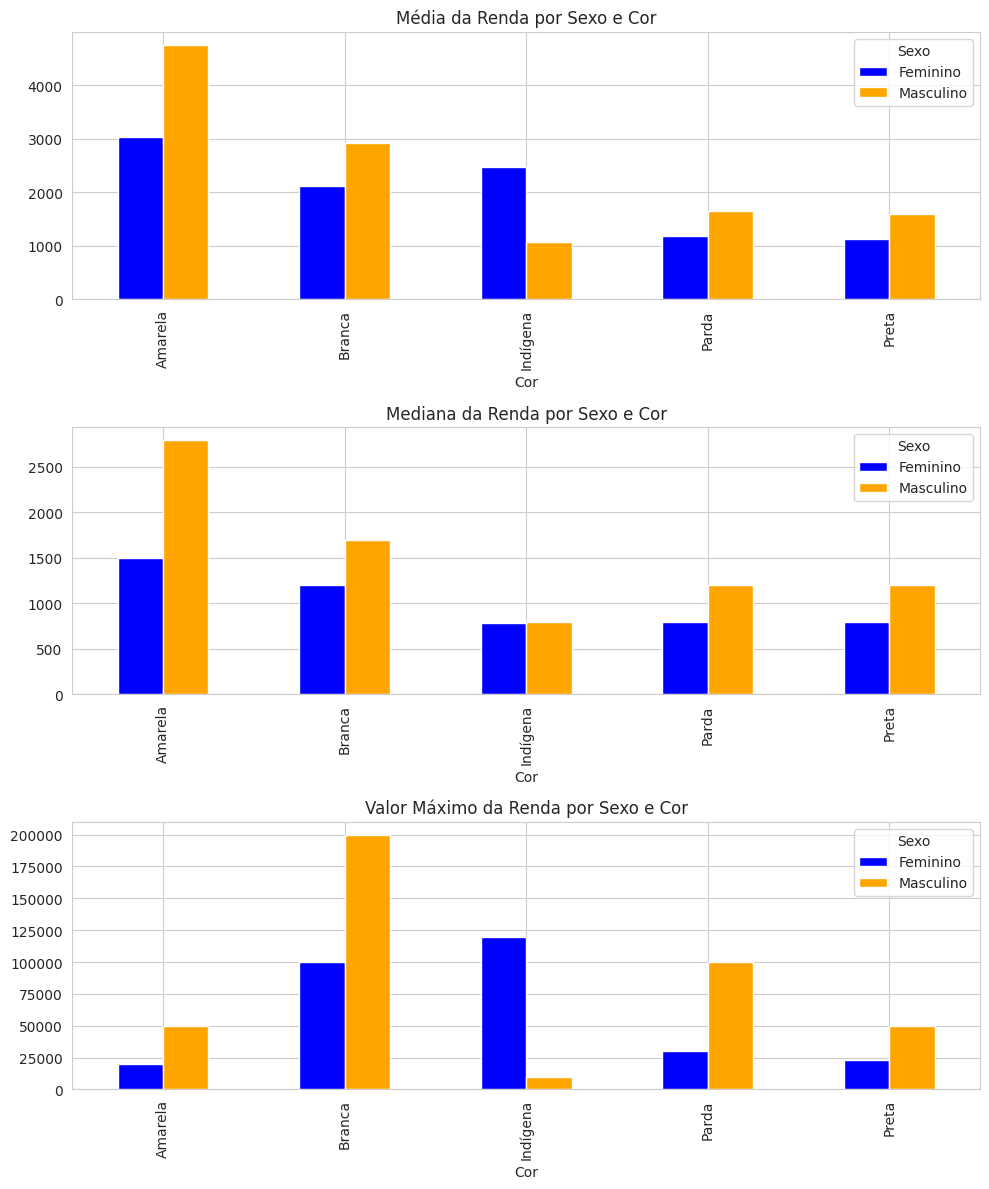

In [25]:
# Calculando a média, mediana e valor máximo da variável Renda segundo Sexo e Cor
estatisticas_por_grupo = df_modificado.groupby(['Sexo', 'Cor'])['Renda'].agg(['mean', 'median', 'max'])

# Separando os resultados por sexo
resultados_por_sexo = estatisticas_por_grupo.unstack(level=0)

# Plotando os gráficos
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Gráfico para média
resultados_por_sexo['mean'].plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title('Média da Renda por Sexo e Cor')

# Gráfico para mediana
resultados_por_sexo['median'].plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title('Mediana da Renda por Sexo e Cor')

# Gráfico para valor máximo
resultados_por_sexo['max'].plot(kind='bar', ax=axes[2], color=['blue', 'orange'])
axes[2].set_title('Valor Máximo da Renda por Sexo e Cor')

plt.tight_layout()
plt.show()


### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [26]:
# Calculando medidas de dispersão da variável Renda segundo Sexo e Cor usando crosstab
medidas_dispersao_por_grupo = pd.crosstab(index=df_modificado['Sexo'], columns=df_modificado['Cor'], 
                                          values=df_modificado['Renda'], aggfunc=['var', 'std'])

# Renomeando as colunas para melhor clareza e arredondando os valores para duas casas decimais
medidas_dispersao_por_grupo.rename(columns={('var', ''): 'Variância', ('std', ''): 'Desvio Padrão'}, inplace=True)
medidas_dispersao_por_grupo = medidas_dispersao_por_grupo.round(2)

print("\nMedidas de dispersão da renda por Sexo e Cor:")
print(medidas_dispersao_por_grupo)



Medidas de dispersão da renda por Sexo e Cor:
                   var                                                     \
Cor            Amarela       Branca      Indígena       Parda       Preta   
Sexo                                                                        
Feminino   13921656.88  10569086.53  1.429818e+08  2547959.94  1821959.52   
Masculino  32957069.62  22570023.41  1.449841e+06  5345747.15  3749293.59   

               std                                       
Cor        Amarela   Branca  Indígena    Parda    Preta  
Sexo                                                     
Feminino   3731.17  3251.01  11957.50  1596.23  1349.80  
Masculino  5740.82  4750.79   1204.09  2312.09  1936.31  


In [27]:
# Calculando medidas de dispersão da variável Renda segundo Sexo e Cor
medidas_dispersao_por_grupo = df_modificado.groupby(['Sexo', 'Cor'])['Renda'].agg(['var', 'std'])

print("\nMedidas de dispersão da renda por Sexo e Cor:")
print(medidas_dispersao_por_grupo)



Medidas de dispersão da renda por Sexo e Cor:
                             var           std
Sexo      Cor                                 
Feminino  Amarela   1.392166e+07   3731.173660
          Branca    1.056909e+07   3251.013154
          Indígena  1.429818e+08  11957.498292
          Parda     2.547960e+06   1596.233048
          Preta     1.821960e+06   1349.799809
Masculino Amarela   3.295707e+07   5740.824820
          Branca    2.257002e+07   4750.791872
          Indígena  1.449841e+06   1204.093490
          Parda     5.345747e+06   2312.087184
          Preta     3.749294e+06   1936.309271


> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

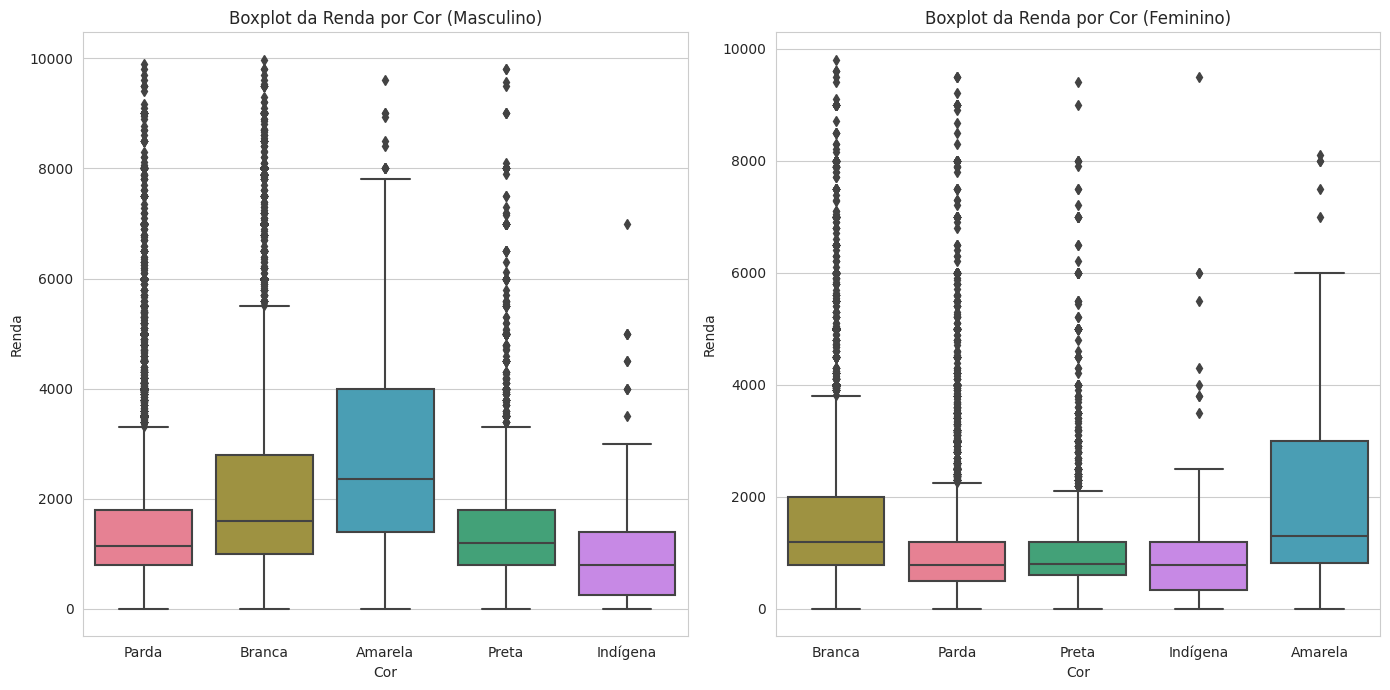

In [31]:
# Identificando os valores únicos da coluna 'Cor' no DataFrame
valores_cor = df_modificado['Cor'].unique()

# Criando uma paleta de cores correspondente aos valores únicos de 'Cor'
paleta_cores = sns.color_palette("husl", len(valores_cor))
cores = dict(zip(valores_cor, paleta_cores))

# Construindo os boxplots separados por sexo com as cores correspondentes para cada categoria de Cor
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='Cor', y='Renda', data=df_filtrado[df_filtrado['Sexo'] == 'Masculino'], palette=cores)
plt.title('Boxplot da Renda por Cor (Masculino)')
plt.xlabel('Cor')
plt.ylabel('Renda')

plt.subplot(1, 2, 2)
sns.boxplot(x='Cor', y='Renda', data=df_filtrado[df_filtrado['Sexo'] == 'Feminino'], palette=cores)
plt.title('Boxplot da Renda por Cor (Feminino)')
plt.xlabel('Cor')
plt.ylabel('Renda')

plt.tight_layout()
plt.show()


# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [32]:
from scipy import stats


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

> ### Conclusões

Escreva suas conclusões aqui...